In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

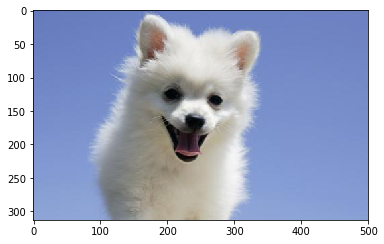

In [14]:
_img=Image.open('dog.jpg')
plt.figure("dog")
plt.imshow(_img)
plt.show()

In [8]:
_writer= tf.python_io.TFRecordWriter("dog_train.tfrecords")

_img=Image.open('dog.jpg')
_img= _img.resize((128,128))
print(_img)

_img_bs=_img.tobytes()

_label = tf.train.Example(features=tf.train.Features(feature={
       "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[1])),
        'img': tf.train.Feature(bytes_list=tf.train.BytesList(value=[_img_bs]))
})) #_label对象对label和image数据进行封装

_writer.write(_label.SerializeToString())  #序列化为字符串

_writer.close()                                                                                 

<PIL.Image.Image image mode=RGB size=128x128 at 0x7FA7DF4A5AC8>


In [12]:
_queue = tf.train.string_input_producer(["dog_train.tfrecords"])#生成一个queue队列
_reader = tf.TFRecordReader()
_, _serialized_label = _reader.read(_queue)#返回文件名和文件
_features = tf.parse_single_example(_serialized_label,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img' : tf.FixedLenFeature([], tf.string),
                                       })#将image数据和label取出来

_img = tf.decode_raw(_features['img'], tf.uint8)
_img = tf.reshape(_img, [128, 128, 3])  #reshape为128*128的3通道图片
_label = tf.cast(_features['label'], tf.int32) #在流中抛出label张量

print(_img)
print(_label)

with tf.Session() as sess: #开始一个会话
    _init_op = tf.initialize_all_variables()
    sess.run(_init_op)
    _coord = tf.train.Coordinator()
    _threads= tf.train.start_queue_runners(coord=_coord)
    _data, l = sess.run([_img,_label])#在会话中取出image和label
    _img=Image.fromarray(_data,'RGB')
    _img.save('_label_dog.jpg')#存下图片
    print(_data, l)

Tensor("Reshape_1:0", shape=(128, 128, 3), dtype=uint8)
Tensor("Cast_1:0", shape=(), dtype=int32)
[[[101 121 192]
  [101 121 192]
  [101 121 192]
  ...
  [109 128 194]
  [109 128 194]
  [109 128 194]]

 [[101 121 190]
  [101 121 190]
  [101 121 190]
  ...
  [109 128 194]
  [109 128 194]
  [109 128 194]]

 [[101 121 190]
  [101 121 190]
  [101 121 190]
  ...
  [109 128 194]
  [109 128 194]
  [109 128 194]]

 ...

 [[142 164 214]
  [142 164 214]
  [142 164 214]
  ...
  [135 158 210]
  [135 158 210]
  [135 158 210]]

 [[142 164 214]
  [142 164 214]
  [142 164 214]
  ...
  [137 160 212]
  [137 160 212]
  [137 160 212]]

 [[142 164 214]
  [142 164 214]
  [142 164 214]
  ...
  [137 160 212]
  [137 160 212]
  [137 160 212]]] 1
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer_1/input_producer_1_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device=

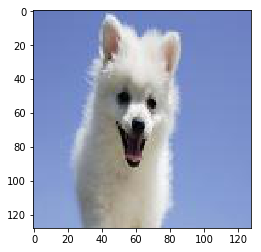

In [13]:
_img=Image.open('_label_dog.jpg')
plt.figure("dog")
plt.imshow(_img)
plt.show()